In [42]:
import pandas as pd
from datetime import datetime, timedelta
import calendar
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from pandas.api.types import CategoricalDtype

In [43]:
purchase_data = pd.read_csv("E:/Shiva/sample_data.csv")

In [44]:
purchase_data.columns

Index(['order_id', 'date', 'user_id', 'total_purchase', 'latitude',
       'longitude'],
      dtype='object')

In [45]:
purchase_data.dtypes

order_id            int64
date               object
user_id             int64
total_purchase    float64
latitude          float64
longitude         float64
dtype: object

In [46]:
purchase_data['date'] = pd.to_datetime(purchase_data['date'])

In [47]:
pd.Series(purchase_data["user_id"]).is_unique

False

## Question 1: Mean and Standard Deviation of Total Purchases

In [48]:
def which_day(x):
    return calendar.day_name[x.weekday()]

purchase_data["dayOfWeek"] = purchase_data["date"].apply(which_day)
#purchase_data["dayOfWeek"] = purchase_data["dayOfWeek"].astype('string')

In [50]:
purchase_data.head()

,order_id,date,user_id,total_purchase,latitude,longitude,dayOfWeek
0,534188,2018-01-01,55205,439000.0,35.7,51.4,Monday
1,534189,2018-01-01,46288,64000.0,35.7,51.3,Monday
2,534194,2018-01-01,53219,242000.0,35.7,51.4,Monday
3,534195,2018-01-01,42800,483000.0,35.7,51.3,Monday
4,534196,2018-01-01,34064,50000.0,35.7,51.3,Monday


In [49]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261749 entries, 0 to 261748
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        261749 non-null  int64         
 1   date            261749 non-null  datetime64[ns]
 2   user_id         261749 non-null  int64         
 3   total_purchase  261706 non-null  float64       
 4   latitude        261749 non-null  float64       
 5   longitude       261749 non-null  float64       
 6   dayOfWeek       261749 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 14.0+ MB


In [51]:
purchase_data.dtypes

order_id                   int64
date              datetime64[ns]
user_id                    int64
total_purchase           float64
latitude                 float64
longitude                float64
dayOfWeek                 object
dtype: object

In [52]:
purchase_data[purchase_data['total_purchase']<=0]

,order_id,date,user_id,total_purchase,latitude,longitude,dayOfWeek
123,534506,2018-01-01,23533,-100000.0,35.7,51.4,Monday
9445,557499,2018-01-07,16560,-1.0,35.7,51.5,Sunday
12003,563820,2018-01-08,36001,-100000.0,35.7,51.4,Monday
17467,577499,2018-01-12,18834,-1.0,35.7,51.5,Friday
19175,581799,2018-01-13,38307,-1.0,35.7,51.3,Saturday
170003,954549,2018-05-01,43197,-100000.0,35.7,51.4,Tuesday
208003,1047493,2018-05-29,21808,-100000.0,35.7,51.4,Tuesday


In [53]:
purchase_data = purchase_data[purchase_data.total_purchase>0]

In [54]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261699 entries, 0 to 261748
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        261699 non-null  int64         
 1   date            261699 non-null  datetime64[ns]
 2   user_id         261699 non-null  int64         
 3   total_purchase  261699 non-null  float64       
 4   latitude        261699 non-null  float64       
 5   longitude       261699 non-null  float64       
 6   dayOfWeek       261699 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 16.0+ MB


In [55]:
len(purchase_data)

261699

In [56]:
a = purchase_data.groupby("dayOfWeek").agg({'total_purchase': ['sum', 'count', 'mean', 'std']})
a

total_purchase                         
                     sum  count     mean      std
dayOfWeek                                        
Friday      6252272000.0  24579 254374.5 244168.6
Monday     11100859000.0  43598 254618.5 244307.8
Saturday   11029513000.0  43170 255490.2 539142.8
Sunday     10367510000.0  40718 254617.4 243147.9
Thursday    6380666000.0  25047 254747.7 245878.5
Tuesday    10437297000.0  41205 253301.7 243381.7
Wednesday  11029414000.0  43382 254239.4 244933.8

In [57]:
cats = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
a.index = a.index.astype(cat_type)
a.reindex(cats)

total_purchase                         
                     sum  count     mean      std
dayOfWeek                                        
Saturday   11029513000.0  43170 255490.2 539142.8
Sunday     10367510000.0  40718 254617.4 243147.9
Monday     11100859000.0  43598 254618.5 244307.8
Tuesday    10437297000.0  41205 253301.7 243381.7
Wednesday  11029414000.0  43382 254239.4 244933.8
Thursday    6380666000.0  25047 254747.7 245878.5
Friday      6252272000.0  24579 254374.5 244168.6

## Question 2: Total Purchases Distribution in weekends and working days

In [58]:
working_days = pd.DataFrame(columns=["working_days"])
weekends = pd.DataFrame(columns=["weekends"])

In [59]:
working_days = purchase_data[(purchase_data['dayOfWeek']!='Thursday') & (purchase_data['dayOfWeek']!='Friday')]['total_purchase']
weekends = purchase_data[(purchase_data['dayOfWeek']=='Friday') | (purchase_data['dayOfWeek']=='Friday')]['total_purchase']

In [60]:
len(weekends)

24579

In [61]:
len(working_days)

212073

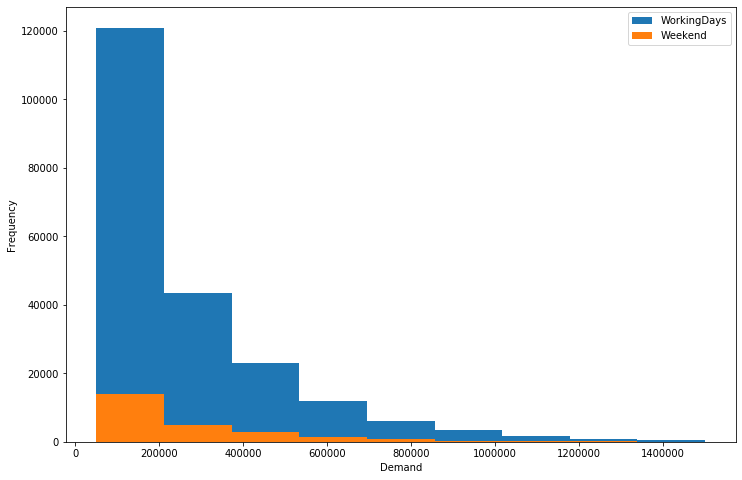

In [62]:
import random
import numpy
from matplotlib import pyplot

bins = numpy.linspace(50000, 1500000, 10)
pyplot.figure(figsize=(12,8))
pyplot.xlabel("Demand")
pyplot.ylabel("Frequency")
pyplot.hist(working_days, bins, alpha=1, label='WorkingDays')
pyplot.hist(weekends, bins, alpha=1, label='Weekend')
pyplot.legend(loc='upper right')
pyplot.show()

## Question 3: RFM Clustering

In [63]:
purchase_end = max(purchase_data['date']) + timedelta(days=1)

In [64]:
rfm_df = purchase_data.groupby('user_id').agg({'date':lambda x: (purchase_end-max(x)), 
                                               'order_id': 'count', 'total_purchase': 'sum'})

In [65]:
rfm_df.head()

,date,order_id,total_purchase
user_id,,,
10000,14 days,6,822000.0
10001,26 days,3,185000.0
10002,4 days,3,163000.0
10003,30 days,4,1159000.0
10004,132 days,2,338000.0


In [66]:
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

In [67]:
rfm_df['Recency'] = rfm_df['Recency'].dt.days

In [68]:
rfm_df.head()

,Recency,Frequency,Monetary
user_id,,,
10000,14,6,822000.0
10001,26,3,185000.0
10002,4,3,163000.0
10003,30,4,1159000.0
10004,132,2,338000.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separa

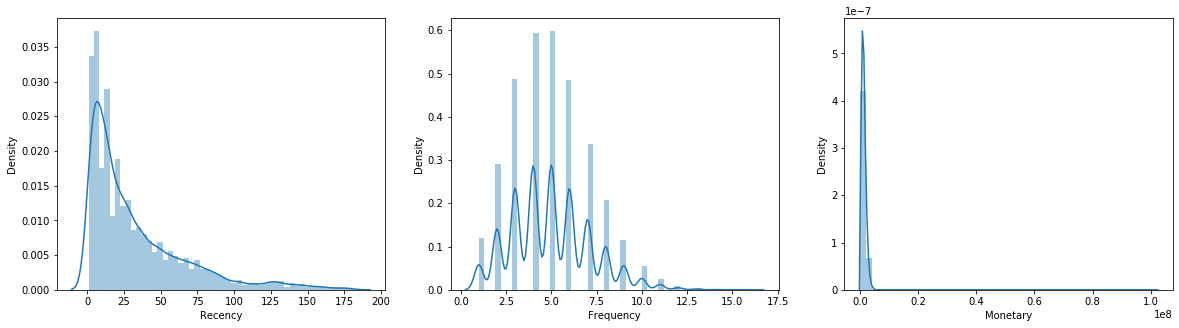

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
for i, feature in enumerate(list(rfm_df.columns)):
    sns.distplot(rfm_df[feature], ax=axes[i])

In [70]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,52756.0,52756.0,52756.0
mean,33.0,5.0,1262368.8
std,33.8,2.2,894088.3
min,1.0,1.0,50000.0
25%,8.0,3.0,676000.0
50%,21.0,5.0,1138000.0
75%,47.0,6.0,1697000.0
max,181.0,16.0,102125000.0


In [71]:
# It's better to normalize R, F and M values.
scaler = MinMaxScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_df))
rfm_normalized.columns = ['n_Recency', 'n_Frequency', 'n_Monetary']
rfm_normalized.head()

,n_Recency,n_Frequency,n_Monetary
0,0.1,0.3,0.0
1,0.1,0.1,0.0
2,0.0,0.1,0.0
3,0.2,0.2,0.0
4,0.7,0.1,0.0


In [72]:
num_cluster = 5

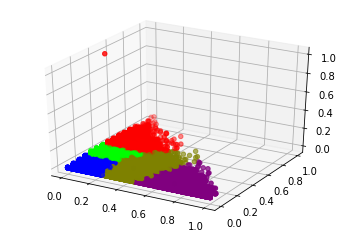

In [73]:
kmeans_model = KMeans(n_clusters=num_cluster, random_state=1234).fit(rfm_normalized)
centers = kmeans_model.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_normalized['n_Recency'], rfm_normalized['n_Frequency'], rfm_normalized['n_Monetary'], cmap="brg",
          c=kmeans_model.predict(rfm_normalized))
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.scatter(centers[:,0], centers[:,1], c='black')

In [74]:
rfm_ = pd.DataFrame(scaler.inverse_transform(rfm_normalized))
rfm_.columns = rfm_df.columns
rfm_['user_id'] = rfm_df.index
rfm_['Cluster'] = kmeans_model.labels_

In [75]:
rfm_.groupby('Cluster').agg({
    'Recency':['mean'],
    'Frequency':['mean'],
    'Monetary':['mean']
})

,Recency,Frequency,Monetary
,mean,mean,mean
Cluster,,,
0,17.7,3.2,819533.7
1,128.0,2.3,584956.1
2,14.7,8.9,2278176.8
3,64.5,3.9,1000839.9
4,15.9,5.9,1497144.0
